# Handling Numerical Data

# Rescaling the data

you need to rescale the data between two values.Rescaling is the common preprocessing task in machine learning. Many algorithm assume that all feature are in same scale tipically between 0 and 1,1 and-1.there are number of rescaling technique but one of the simplest way is with min_max scaller.Min_max scaller uses minimum and maximum value to rescale within that range.

    specially min-max calcute
    ,x(i)'=[x(i)-min(x)]/[max(x)-min(x)
    where x is the feature vector,x(i) is an individual element of feature.x(i)' is the rescaled element.

In [3]:
import numpy as np
feature=np.array([[-500.5],[-100.1],[0],[100.1],[900.1]])
feature

array([[-500.5],
       [-100.1],
       [   0. ],
       [ 100.1],
       [ 900.1]])

In [4]:
from sklearn import preprocessing

In [6]:
#scalling between 0 and 1
min_max_scale=preprocessing.MinMaxScaler(feature_range=(0,1))

In [7]:
scaled_feature=min_max_scale.fit_transform(feature)

In [8]:
scaled_feature

array([[0.        ],
       [0.28587748],
       [0.35734685],
       [0.42881622],
       [1.        ]])

In [9]:
#scalling between -1 and 1
min_max_scales=preprocessing.MinMaxScaler(feature_range=(-1,1))
scaled_features=min_max_scales.fit_transform(feature)

In [10]:
scaled_features

array([[-1.        ],
       [-0.42824504],
       [-0.2853063 ],
       [-0.14236756],
       [ 1.        ]])

# Standardizing a feature

A common alternative of the min-max_scalling is the standarized method which scaled in approximately standard normally distributed.to achive this,we use standarization of the  to tranform the data such that it has a mean x-bar, of 0 and standerd deviation sigma of 1,specially the each data transgormed so that

    x(i)'=[x(i)-x(bar)]/sigma
    where, x(i)' is the standarized form of the x(i) and sigma is the standerd deviation.The transformed feture represent the number of standard deviation the original value form the features mean's value(also z-score in the statistic)

In [13]:
#you want to transform feature data to have mean 0 and std deviation 1
from sklearn import preprocessing
scaled=preprocessing.StandardScaler()
standarized=scaled.fit_transform(feature)

In [14]:
standarized

array([[-1.26731418],
       [-0.39306347],
       [-0.17450079],
       [ 0.04406189],
       [ 1.79081655]])

In [15]:
#to cheak mean and std of standarized
print('mean of standarized:',standarized.mean())
print('standard deviation of the standarized:',standarized.std())

mean of standarized: 0.0
standard deviation of the standarized: 1.0


If our data contain of significant of outlier,it can negetive impact on the standardization by effecting the feature mean and variance.It is scenario it is useful to rescaling the feture using the median and quartile range.In skit learn we do this using
using robust scaler method

In [17]:
robust_scaler=preprocessing.RobustScaler()
scaled=robust_scaler.fit_transform(feature)

In [18]:
scaled

array([[-2.5     ],
       [-0.5     ],
       [ 0.      ],
       [ 0.5     ],
       [ 4.496004]])

# Normalizing of the observation

Many rescaling method (min_max_scaller,Standarization) use in the feature .How ever we can also rescale across observation.Normalizer rescale the value on the individual observation to have unit form(the sum of there length 1).This type of re scaling used when we have many equivalent feature(e.g. text classification, when every word or n-group is the feature).

    Normalizer provides three norm option with Euclidean Normalizer as norm,
    
    ||x||=np.sqrt(x1**2+x2**2+x3**2....+xn**2)
    where x is an individual observation and xn is the observation value of nth feature
    
    x1'=x1/||x||,x2'=x2/||x||
    where x1',x2' the scaled value of the x1,x2 respectively

    Eucludean Norm

In [21]:
1.1/np.sqrt(1.1**2+3.4**2)

0.30782028541466255

In [22]:
3.4/np.sqrt(1.1**2+3.4**2)

0.9514445185544115

In [23]:
1.5/np.sqrt(1.5**2+20.2**2)

0.07405353471346562

In [24]:
20.2/np.sqrt(1.5**2+20.2**2)

0.9972542674746705

In [29]:
1.63/np.sqrt(1.63**2+34.4**2)

0.047330616967864184

In [30]:
34.4/np.sqrt(1.63**2+34.4**2)

0.9988792783402012

In [45]:
from sklearn.preprocessing import Normalizer
feature=np.array([[0.5,0.5],[1.1,3.4],[1.5,20.2],[1.63,34.4],[10.9,3.3]])
scaled=Normalizer('l2')
normalized=scaled.fit_transform(feature)

In [46]:
normalized

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

Manhattan Norm

    we can calculate manhattan norm as the 
    ||x||=sum(xi)|1 to n
    
    or ||x||=x1+x2+x3+...+xn

In [34]:
1.1/(1.1+3.4)

0.24444444444444446

In [35]:
3.4/(1.1+3.4)

0.7555555555555555

In [36]:
1.63/(1.63+34.4)

0.04524007771301693

In [37]:
34.4/(1.63+34.4)

0.954759922286983

In [32]:
scale=Normalizer('l1')
normalize=scale.fit_transform(feature)
normalize

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

     Euclidean Norm

In [41]:
1/np.sqrt(1**2+2**2+3**2+4**2)

0.18257418583505536

In [42]:
2/np.sqrt(1**2+2**2+3**2+4**2)

0.3651483716701107

In [44]:
3/np.sqrt(1**2+2**2+3**2+4**2)

0.5477225575051661

In [43]:
4/np.sqrt(1**2+2**2+3**2+4**2)

0.7302967433402214

In [38]:
a=np.array([[1,2,3,4],[4,5,6,7],[7,8,9,10]])
scaled=Normalizer('l2')
normalized=scaled.fit_transform(a)
normalized

array([[0.18257419, 0.36514837, 0.54772256, 0.73029674],
       [0.35634832, 0.4454354 , 0.53452248, 0.62360956],
       [0.40824829, 0.46656947, 0.52489066, 0.58321184]])

# Generating Polynomial and intereaction features

Polynomial Feature often created that when we want to include the notion thet there exists a non_linear relation ship between the feature and target.often we run into situation where the effect of one feature is dependent on another feature.we can encode this relationship by including a interaction feature that is product of individual feature

    Generate polynomial and Interaction features:
    Generate new feature matrix consisting of all polynomial combinations of the feature with degree less than or equal to the specified range.For example ,if an input sample is two dimensional and of the form [a,b],the degree of polynomial features are [1,a,b,a**2,a*b,b**2]

In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
feature=np.array([[2,3],[2,3]])

In [19]:
polynomial_intraction=PolynomialFeatures(degree=2,include_bias=True)
polynomial_feature=polynomial_intraction.fit_transform(feature)

In [20]:
polynomial_feature

array([[1., 2., 3., 4., 6., 9.],
       [1., 2., 3., 4., 6., 9.]])

In [21]:
polynomials_interaction=PolynomialFeatures(degree=3,include_bias=True)
polynomial_features=polynomials_interaction.fit_transform(feature)

In [22]:
polynomial_features

array([[ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.],
       [ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In [26]:
X=np.arange(6).reshape(3,2)
forcast=PolynomialFeatures(degree=2)
poly_nom=forcast.fit_transform(X)
poly_nom

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [27]:
X=np.arange(6).reshape(3,2)
forcast=PolynomialFeatures(degree=2,interaction_only=True)
poly_nom=forcast.fit_transform(X)
poly_nom

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [28]:
a=np.array([[4,5],[7,8],[3,4]])
poly_nom=PolynomialFeatures(degree=2,include_bias=False)
polynomial_features=poly_nom.fit_transform(a)

In [29]:
polynomial_features

array([[ 4.,  5., 16., 20., 25.],
       [ 7.,  8., 49., 56., 64.],
       [ 3.,  4.,  9., 12., 16.]])

# Transforming Feature

In [30]:
def add_ten(a):
    return a+10

In [32]:
feature=np.array([[2,3],[4,5],[6,7]])
feature

array([[2, 3],
       [4, 5],
       [6, 7]])

In [34]:
from sklearn.preprocessing import FunctionTransformer
fittransform=FunctionTransformer(add_ten)

In [35]:
transform_feature=fittransform.transform(feature)

In [36]:
transform_feature

array([[12, 13],
       [14, 15],
       [16, 17]])

In [38]:
import pandas as pd
df=pd.DataFrame(feature,columns=['feature_1','feature_2'])

In [39]:
df

,feature_1,feature_2
0,2,3
1,4,5
2,6,7


In [40]:
df.apply(add_ten)

,feature_1,feature_2
0,12,13
1,14,15
2,16,17


# Detecting Outliers

# Detecting the outlier with EllipticalEnvelop

    EllepticalEnvelope assume that the data is normally distributed and based on that assumption "draw" an ellipse around the data,classifying any observation inside the ellipse as an inlier (labeled as 1) and any observation outside the ellipse as an outlier(labeled as -1).A major limitation of this approach need to specify a contamination parameter which is the proportion of observation that are outlier,a value we dont know,so this method of outlier detection is not recommended

In [45]:
#created a stimulated data
from sklearn.datasets import make_blobs
feature,target=make_blobs(n_samples=10,n_features=2,centers=1,random_state=2)
feature

array([[ -2.15820985,  -9.63790953],
       [ -2.33805418, -10.39048298],
       [ -3.07353754, -10.32322273],
       [ -1.23856256, -10.59940081],
       [ -1.29923245,  -8.30647414],
       [ -0.77722054, -10.72676345],
       [ -2.02797291,  -9.47245011],
       [ -0.74104364, -10.07763506],
       [ -0.72864791,  -7.18926735],
       [ -3.41629805,  -7.84120456]])

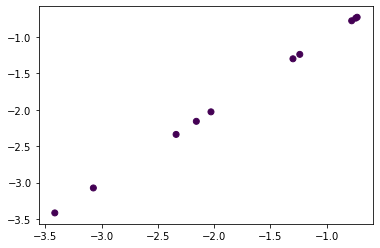

In [46]:
import matplotlib.pyplot as plt
plt.scatter(feature[:,0],feature[:,0],c=target)

In [47]:
from sklearn.covariance import EllipticEnvelope
outlier_detector=EllipticEnvelope(contamination=0.1)
outlier_detector.fit(feature)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
                 store_precision=True, support_fraction=None)

In [48]:
outlier_detector.predict(feature)

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

In [49]:
#after adding outlier
feature[5,0]=100000
feature[5,1]=100000
#outlier detection
from sklearn.covariance import EllipticEnvelope
outlier_detection=EllipticEnvelope(contamination=0.1)
outlier_d=outlier_detection.fit(feature)
outlier_d.predict(feature)

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1])

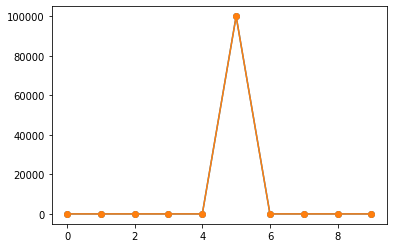

In [50]:
import matplotlib.pyplot as plt
plt.plot(feature,marker='o')

# Detecting Outlier with IQR (Inter Quartile Range)

In [51]:
import numpy as np
feature=feature[:,0]
def outlier_detection(x):
    q1,q3=np.percentile(x,[25,75])
    iqr=q3-q1
    lower_bound=q1-iqr*1.5
    upper_bound=q3+iqr*1.5
    return np.where((x>upper_bound)|(x<lower_bound))

In [52]:
#we clearly see that 6th element in the array is an outlier as setted above
outlier_detection(feature)

(array([5], dtype=int64),)

# Handling the outlier:

In [2]:
import pandas as pd
house=pd.DataFrame()

In [3]:
house['price']=[100000,150000,120000,1200000,140000]
house['bathroom']=[4,3,4,101,2]
house['sqft']=[1500,2000,1800,130000,2000]

In [4]:
house

,price,bathroom,sqft
0,100000,4,1500
1,150000,3,2000
2,120000,4,1800
3,1200000,101,130000
4,140000,2,2000


In [7]:
#detect the outlier
import numpy as np
house['outlier']=np.where(house['bathroom']>20,'yes','no')

In [8]:
house

,price,bathroom,sqft,outlier
0,100000,4,1500,no
1,150000,3,2000,no
2,120000,4,1800,no
3,1200000,101,130000,yes
4,140000,2,2000,no


In [14]:
#filter observation
house[house['bathroom']<20]

,price,bathroom,sqft,outlier
0,100000,4,1500,0
1,150000,3,2000,0
2,120000,4,1800,0
4,140000,2,2000,0


In [12]:
#0 stand for no and 1 for yes
house['outlier']=np.where(house['bathroom']>20,1,0)

In [13]:
house

,price,bathroom,sqft,outlier
0,100000,4,1500,0
1,150000,3,2000,0
2,120000,4,1800,0
3,1200000,101,130000,1
4,140000,2,2000,0


In [15]:
#further dampen the effect of outlier
house['log of sqft']=np.log(house['sqft'])

In [16]:
house

,price,bathroom,sqft,outlier,log of sqft
0,100000,4,1500,0,7.313220
1,150000,3,2000,0,7.600902
2,120000,4,1800,0,7.495542
3,1200000,101,130000,1,11.775290
4,140000,2,2000,0,7.600902


# Discretizating feature

In [18]:
age=np.array([[6],[12],[15],[21],[36],[65]])
age

array([[ 6],
       [12],
       [15],
       [21],
       [36],
       [65]])

In [20]:
from sklearn.preprocessing import Binarizer
binary=Binarizer(22)
binary.fit_transform(age)
#value below 22 will be 0 and greater than 22 will be 1

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1]])

In [25]:
np.digitize(age,bins=[10,20,30,40,50])#0-10-->0,10-20-->1,20-30-->2,30-40-->3,40-50-->4,50-rest-->5

array([[0],
       [1],
       [1],
       [2],
       [3],
       [5]], dtype=int64)

In [31]:
price=np.array([0,10,20,30]).reshape(1,-1)
binary.fit_transform(price)

array([[0, 0, 0, 1]])

In [40]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
data,_=make_blobs(n_samples=20,n_features=2,centers=3,random_state=1)
feature

array([[ -7.75205488,  -8.99843375],
       [ -7.73612831,  -8.1658927 ],
       [ -0.79415228,   2.10495117],
       [-10.17014071,  -4.83120697],
       [-11.09833168,  -2.80862484],
       [ -9.09612178,  -3.45085421],
       [ -7.25671774,  -9.04085707],
       [ -9.09685655,  -4.63707641],
       [  0.08525186,   3.64528297],
       [-10.12060273,  -4.88911798],
       [ -1.98197711,   4.02243551],
       [ -0.19745197,   2.34634916],
       [ -0.52579046,   3.3065986 ],
       [ -7.75654294,  -8.54998163],
       [ -5.40508001,  -7.41118394],
       [ -9.95549876,  -3.37053333],
       [ -2.18773166,   3.33352125],
       [ -1.34052081,   4.15711949],
       [-10.26560058,  -3.42299308],
       [ -8.18219253,  -7.91881241]])

In [43]:
p=pd.DataFrame(feature,columns=['feature_1','feature_2'])

In [41]:
cluster=KMeans(n_clusters=3,random_state=0)
c=cluster.fit(feature)
c

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [44]:
p['groups']=cluster.predict(feature)

In [45]:
p

,feature_1,feature_2,groups
0,-7.752055,-8.998434,1
1,-7.736128,-8.165893,1
2,-0.794152,2.104951,0
3,-10.170141,-4.831207,2
4,-11.098332,-2.808625,2
5,-9.096122,-3.450854,2
6,-7.256718,-9.040857,1
7,-9.096857,-4.637076,2
8,0.085252,3.645283,0
9,-10.120603,-4.889118,2


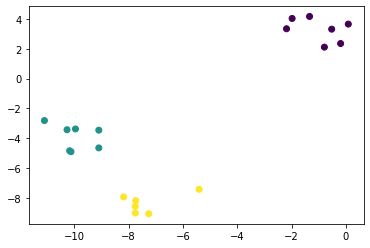

In [50]:
import matplotlib.pyplot as plt
plt.scatter(feature[:,0],feature[:,1],c=target)

# Deleting Observation With Missing Value

In [65]:
feature=np.array([[1.1,11.1],[2.2,22.2],[3.3,33.3],[4.4,44.4],[np.nan,55.5]])
feature

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3],
       [ 4.4, 44.4],
       [ nan, 55.5]])

In [66]:
feature[~np.isnan(feature)]

array([ 1.1, 11.1,  2.2, 22.2,  3.3, 33.3,  4.4, 44.4, 55.5])

In [ ]:
#keep only feature that are not not missing (denoted by ~).

In [67]:
feature=feature[~np.isnan(feature).any(axis=1)]

In [68]:
p=pd.DataFrame(feature,columns=['feature_1','feature_2'])

In [69]:
p

,feature_1,feature_2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4


In [70]:
#altenative we can drop null value
p.dropna()

,feature_1,feature_2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4


# Imputing Missing Values

    Nearest neighbour imputation of missing value:
    
    The KNNImputer class provide imputation for filling in missing values using the K-nearest Neighbour Approach.Bu default ,a encludian distance metric that supports missing values,nan_encludian_distance,is used to find the nearest neighbours.Each missing feature is imputed using value from n_neighbours nearest neighbour that have a value for the feature.The feature of the neighbors are weighted are averaged uniformly or weighted by distance to each neighbour.If a sample has more than one eature missing ,then the neighbors for that sample be different depending on the particular feature being imputed. When the number of available neighbor is less than n_neighbors and there are no defined distance to training set,the traing set average being used during imputation.If there is at least one neighbors with a defined distance .the weighted or unweighted average of theremaining neighbors will be used during imputation.If a feature is always missing in training then it is removed during the transform.

In [58]:
#impute missing value using KNNImputer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.datasets import make_blobs
feature,_=make_blobs(n_samples=20,n_features=2,random_state=1)

In [59]:
scaler=StandardScaler()

In [60]:
standerd_feature=scaler.fit_transform(feature)

In [61]:
true_value=standerd_feature[0,0]

In [62]:
standerd_feature[0,0]=np.nan

In [63]:
impute=KNNImputer()

In [64]:
standerd_feature_after_impute=impute.fit_transform(standerd_feature)

In [65]:
print('True value:',true_value)
print('Imputed value using KNN:',standerd_feature_after_impute[0,0])

True value: -0.4348722355506801
Imputed value using KNN: -0.31162653811732766


In [66]:
#impute missing value using mean value
from sklearn.impute import SimpleImputer
mean_imputer=SimpleImputer(strategy='mean')
imputed_feature=mean_imputer.fit_transform(standerd_feature)

In [70]:
print('True value:',true_value)
print('Impute feature using mean::',imputed_feature[0,0])

True value: -0.4348722355506801
Impute feature using mean:: 0.02288801239740435


In [53]:
#handling with missing value using knn imputer
import numpy as np
from sklearn.impute import KNNImputer
X=np.array([[1,np.nan,2],[2,3,4],[np.nan,5,6],[8,7,9],[7,5,np.nan]])
imputer=KNNImputer()
imputed_feature=imputer.fit_transform(X)
imputed_feature

array([[1.  , 5.  , 2.  ],
       [2.  , 3.  , 4.  ],
       [4.5 , 5.  , 6.  ],
       [8.  , 7.  , 9.  ],
       [7.  , 5.  , 5.25]])

In [54]:
#handling with missing value using mean
from sklearn.impute import SimpleImputer
imputed=SimpleImputer()
imputer_feature=imputed.fit_transform(X)
imputer_feature

array([[1.  , 5.  , 2.  ],
       [2.  , 3.  , 4.  ],
       [4.5 , 5.  , 6.  ],
       [8.  , 7.  , 9.  ],
       [7.  , 5.  , 5.25]])

In [55]:
X

array([[ 1., nan,  2.],
       [ 2.,  3.,  4.],
       [nan,  5.,  6.],
       [ 8.,  7.,  9.],
       [ 7.,  5., nan]])